### "How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?"

In [260]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
pd.set_option('display.max_column', 50)

In [262]:
# load csv dataset 
raw_df = pd.read_csv('D:\Data Analytics\DATA-1202\Assignments\survey.csv')
raw_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [265]:
raw_df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [180]:
# shape of dataframe
raw_df.shape

(1259, 27)

In [181]:
# columns in dataframe
raw_df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [182]:
## Total countries survey
print('Total countries surveyed: ',len(raw_df['Country'].value_counts()))

Total countries surveyed:  48


In [183]:
raw_df.duplicated().sum()

0

In [184]:
# features will null values
feature_na = [feature for feature in raw_df.columns if raw_df[feature].isnull().sum()>1]
feature_na
for feature in feature_na:
    print(feature, raw_df[feature].isnull().sum())

state 515
self_employed 18
work_interfere 264
comments 1095


In [266]:
## drop columns from datasets that are not useful
data = raw_df.drop(columns=['Timestamp','comments'])
data.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [267]:
## handle missing values in self_employed column
raw_df['self_employed'] = raw_df['self_employed']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.117647, 0.882353], size=len(raw_df))))

In [268]:
## handle missing values in work_interfere column
raw_df['work_interfere'] = raw_df['work_interfere']\
                      .fillna(pd.Series(np.random.choice(['Sometimes', 'Never', 'Rarely', 'Often']
                                                         , p=[0.467337, 0.214070, 0.173869, 0.144724], size=len(raw_df))))

In [359]:
### Keep only relevent columns and start analysis 

In [360]:
new_df = raw_df[['Age', 'Gender', 'Country','remote_work','self_employed','tech_company','phys_health_interview','mental_health_interview',
                  'mental_health_consequence','phys_health_consequence','family_history','treatment','benefits', 'wellness_program']]
new_df.head()

,Age,Gender,Country,remote_work,self_employed,tech_company,phys_health_interview,mental_health_interview,mental_health_consequence,phys_health_consequence,family_history,treatment,benefits,wellness_program
0,37,Female,United States,No,No,Yes,Maybe,No,No,No,No,Yes,Yes,No
1,44,M,United States,No,No,No,No,No,Maybe,No,No,No,Don't know,Don't know
2,32,Male,Canada,No,No,Yes,Yes,Yes,No,No,No,No,No,No
3,31,Male,United Kingdom,No,No,Yes,Maybe,Maybe,Yes,Yes,Yes,Yes,No,No
4,31,Male,United States,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Don't know


In [361]:
# check null values

new_df.isnull().sum()

Age                          0
Gender                       0
Country                      0
remote_work                  0
self_employed                0
tech_company                 0
phys_health_interview        0
mental_health_interview      0
mental_health_consequence    0
phys_health_consequence      0
family_history               0
treatment                    0
benefits                     0
wellness_program             0
dtype: int64

In [191]:
## considering maybe as yes in mental_health_consequence and phys_health_consequence

In [362]:
print(new_df['mental_health_consequence'].unique())

['No' 'Maybe' 'Yes']


In [363]:
new_df.loc[(new_df['mental_health_consequence'].isin(['Yes','Maybe'])) ,"mental_health_consequence"] = 'Yes'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [364]:
new_df.loc[(new_df['phys_health_consequence'].isin(['Yes','Maybe'])) ,"phys_health_consequence"] = 'Yes'

In [366]:
print(new_df['phys_health_consequence'].unique())

['No' 'Yes']


In [367]:
## Grouping gender in three categories
new_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [368]:
l_female = ['Female','female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']
l_male = ['male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man', 'msle','cis male', 'Cis Man','Malr','Mail']
l_other =['A little about you', 'p', 'Nah', 'Enby', 'Trans-female','something kinda male?','queer/she/they','non-binary','All',
           'fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous','Trans woman','Neuter', 
           'Female (trans)','queer','ostensibly male, unsure what that really means','trans']


new_df.loc[(new_df['Gender'].isin(l_female)), "Gender"] = 'Female'
new_df.loc[(new_df['Gender'].isin(l_male)), 'Gender'] = 'Male'
new_df.loc[(new_df['Gender'].isin(l_other)), 'Gender'] = 'Other'


In [369]:
new_df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [370]:
print(len(new_df['Gender'].unique()))

3


In [371]:
new_df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [373]:
### cleaning age column
new_df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [374]:
age =[]
for i in data['Age']:
    if (i<11) or (i>99):
        age.append(31)   # Median
    else:
        age.append(i)


new_df['Age'] = age        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [375]:
new_df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 11, 72], dtype=int64)

In [376]:
# grouping age in four categories 

conditions = [(new_df['Age'] < 18),(new_df['Age'] <= 35 ),(new_df['Age'] <=55 ),(new_df['Age'] <=80 )]

values = ["under 18", "young age", "mid age"," old age"]

new_df['Age_categories'] = np.select(conditions, values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [377]:
new_df['Age'] = new_df['Age_categories']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [378]:
new_df['Age'].unique()

array(['mid age', 'young age', ' old age', 'under 18'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


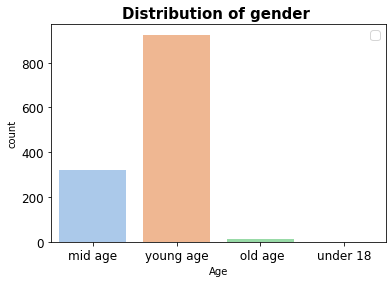

In [379]:
# Young age group is the most predominent respondence in survey

sns.countplot(new_df['Age'], palette="pastel")
plt.title('Distribution of gender ', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

In [380]:
### Grouping Countries in categories
new_df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [381]:
American_country = ['United States', 'Canada', 'Bahamas','Mexico','Brazil','Colombia', 'Bahamas, The','Costa Rica']
Asian_country = ['India', 'Philippines', 'China','Thailand','Singapore','Georgia', 'Israel','Japan']
European_country = ['United Kingdom','Greece','Czech Republic','Austria','Italy','Sweden','Romania', 'Belgium', 'Ireland','Norway','Germany', 
                    'Russia','Bulgaria', 'France','Portugal', 'Netherlands', 'Switzerland', 'Poland','Spain', 'Finland',
                    'Hungary', 'Bosnia and Herzegovina', 'Moldova','Slovenia','Latvia', 'Croatia','Denmark']
African_country =['Nigeria', 'South Africa','Zimbabwe','Uruguay']
Oceania = ['New Zealand','Australia']


new_df.loc[(new_df['Country'].isin(American_country)), 'Country'] = 'American_country'
new_df.loc[(new_df['Country'].isin(Asian_country)), 'Country'] = 'Asian_country'
new_df.loc[(new_df['Country'].isin(European_country)), 'Country'] = 'European_country'
new_df.loc[(new_df['Country'].isin(African_country)), 'Country'] = 'African_country'
new_df.loc[(new_df['Country'].isin(Oceania)), 'Country'] = 'Oceania'


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [382]:
new_df['Country'].unique()

array(['American_country', 'European_country', 'Oceania', 'Asian_country',
       'African_country'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

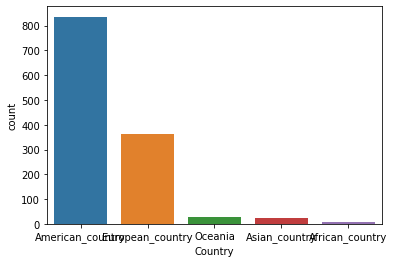

In [383]:
sns.countplot(new_df['Country'])

In [297]:
new_df.groupby(['Country','Age','Gender'])['mental_health_consequence'].count().reset_index()

,Country,Age,Gender,mental_health_consequence
0,African_country,old age,Male,1
1,African_country,mid age,Female,1
2,African_country,mid age,Male,1
3,African_country,young age,Male,5
4,African_country,young age,Other,1
5,American_country,old age,Female,2
6,American_country,old age,Male,11
7,American_country,mid age,Female,44
8,American_country,mid age,Male,188
9,American_country,mid age,Other,3


In [296]:
new_df.groupby(['Country','Age'])['Gender'].count()

Country           Age      
African_country    old age       1
                  mid age        2
                  young age      6
American_country   old age      13
                  mid age      235
                  under 18       1
                  young age    587
Asian_country     mid age        4
                  young age     20
European_country  mid age       73
                  young age    288
Oceania           mid age        5
                  young age     24
Name: Gender, dtype: int64

### Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


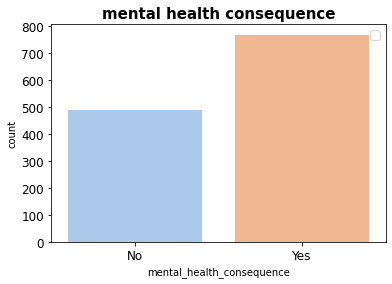

In [387]:
sns.countplot(new_df['mental_health_consequence'], palette='pastel')
plt.title('mental health consequence',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


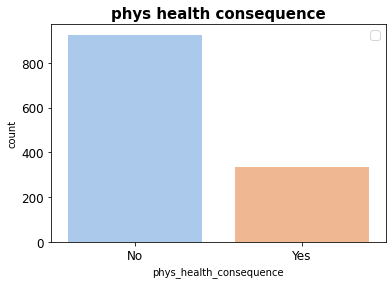

In [388]:
sns.countplot(new_df['phys_health_consequence'], palette='pastel')
plt.title('phys health consequence',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


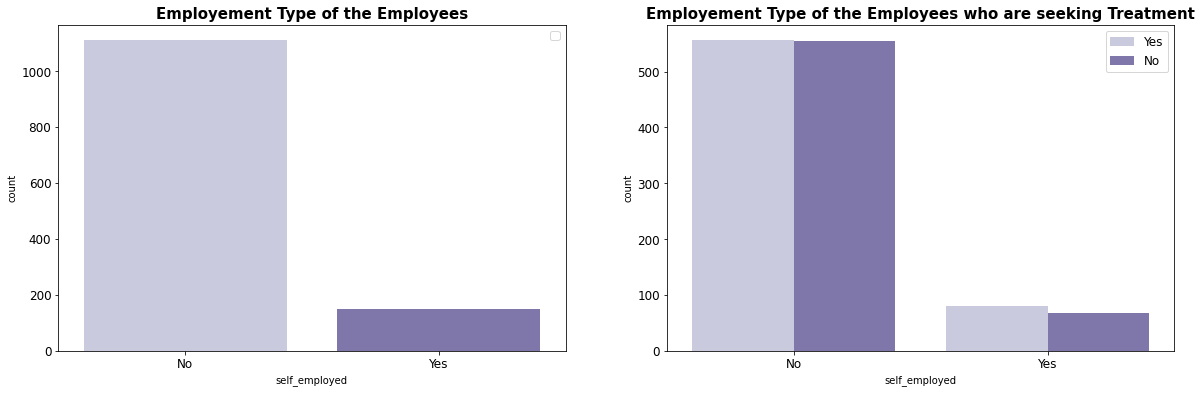

In [389]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)

sns.countplot(new_df['self_employed'], palette = 'Purples')
plt.title('Employement Type of the Employees', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(raw_df['self_employed'], hue = raw_df['treatment'], palette = 'Purples')
plt.title('Employement Type of the Employees who are seeking Treatment',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


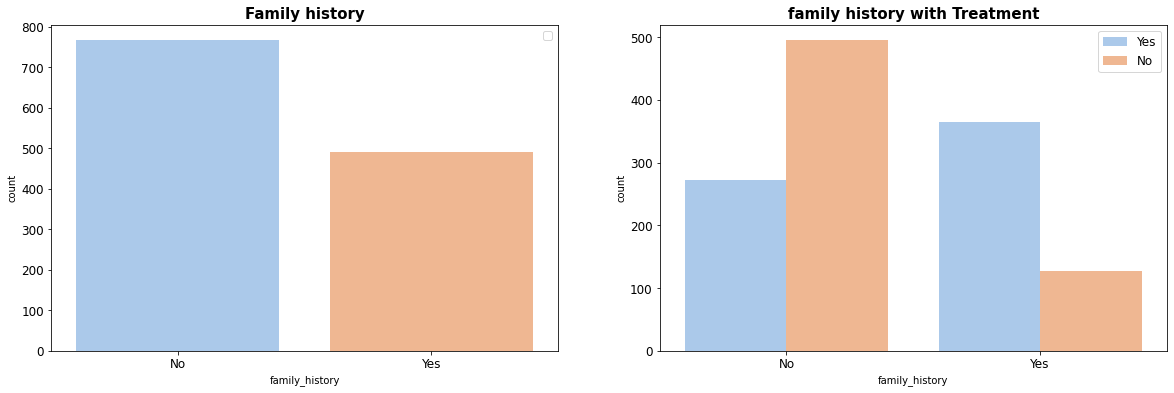

In [395]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)

sns.countplot(new_df['family_history'], palette='pastel')
plt.title('Family history', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(raw_df['family_history'], hue = raw_df['treatment'], palette='pastel')
plt.title('family history with Treatment',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


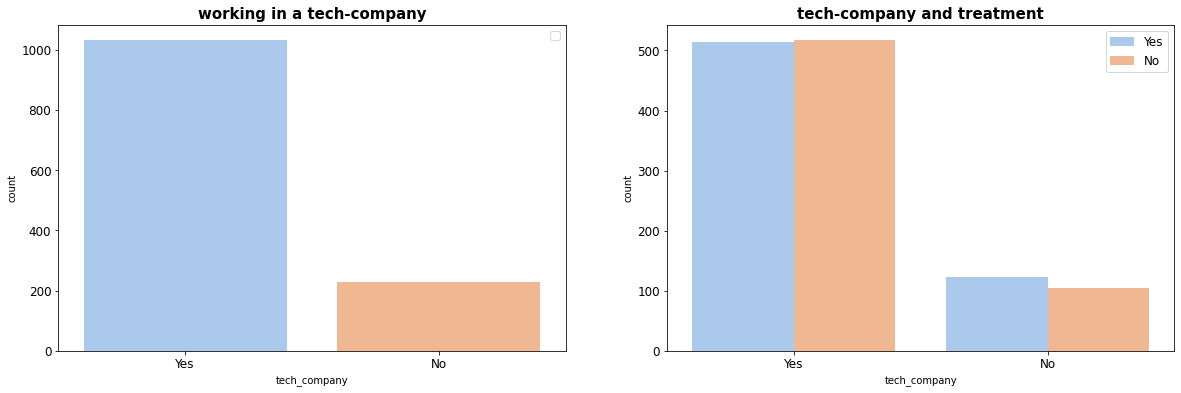

In [391]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)

sns.countplot(new_df['tech_company'], palette='pastel')
plt.title('working in a tech-company', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.subplot(1,2,2)
sns.countplot(new_df['tech_company'], hue= new_df['treatment'], palette='pastel')
plt.title('tech-company and treatment',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


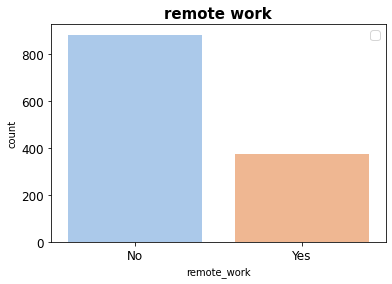

In [409]:
sns.countplot(new_df['remote_work'], palette='pastel')
plt.title('remote work',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


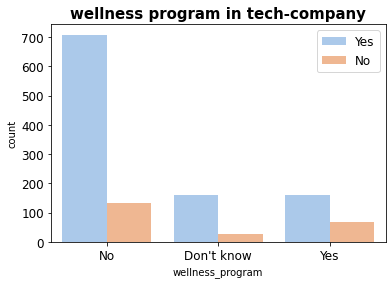

In [407]:
sns.countplot(new_df['wellness_program'], hue =new_df['tech_company'], palette='pastel')
plt.title('wellness program in tech-company',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


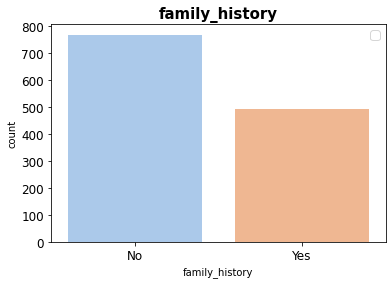

In [408]:
## family history and treatment
## most respondents do not have family history
sns.countplot(new_df['family_history'], palette='pastel')
plt.title('family_history',  fontsize=15, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [346]:
new_df.groupby(['Country'])['mental_health_consequence'].value_counts()

Country           mental_health_consequence
African_country   Yes                            5
                  No                             4
American_country  Yes                          519
                  No                           317
Asian_country     Yes                           19
                  No                             5
European_country  Yes                          210
                  No                           151
Oceania           Yes                           16
                  No                            13
Name: mental_health_consequence, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

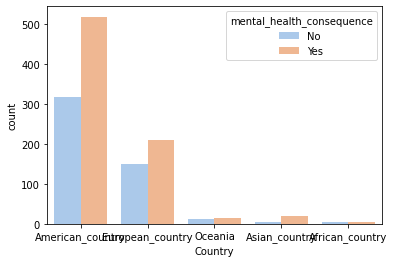

In [406]:
sns.countplot(new_df['Country'], hue=new_df['mental_health_consequence'], palette='pastel')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

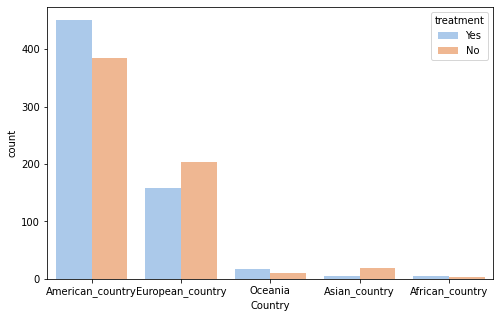

In [403]:
plt.figure(figsize = (8,5))
sns.countplot(new_df['Country'], hue= new_df['treatment'], palette='pastel')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

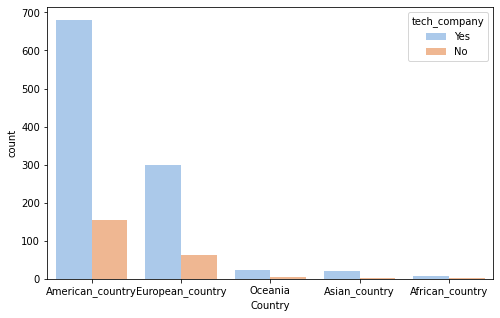

In [410]:
plt.figure(figsize = (8,5))
sns.countplot(new_df['Country'], hue= new_df['tech_company'], palette='pastel')